#https://wikidocs.net/64512

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
tf.keras.backend.clear_session()

batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (None, img_rows, img_cols)

# convert class vectors to binary class matrices
# y_train = tf.keras.utils.to_categorical(y_train, num_classes)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes)

epoch = 8
batch_size = 2000

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[0].shape, x_train.shape, 

((28, 28, 1), (60000, 28, 28, 1))

In [ ]:
# import tensorflow_datasets as tfds

# dataset, info =  tfds.load('mnist', as_supervised=True, with_info=True)
# train_dataset, test_dataset = dataset['train'], dataset['test']

# num_train_examples= info.splits['train'].num_examples

In [ ]:
# train_dataset = train_dataset.take(7)
# import matplotlib.pyplot as plt

# for image, label in train_dataset:  		# example is (image, label)
#  	print(image.shape, type(image), label, type(label))
#   # plt.imshow(image.numpy())


In [ ]:
# import matplotlib.pyplot as plt
# plt.imshow(x_train[9]), y_train[9]						# 9
# print(y_train[:3])


#Base

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(layers.Input(shape=x_train[0].shape))   
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))    # (batch_size, rows, cols, channels)
model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [ ]:
tf.keras.backend.clear_session()
hist = model.fit(x_train, y_train,  batch_size=batch_size, epochs=epoch, validation_data=(x_test, y_test)) #within validation_data

Epoch 1/8
30/30 [==============================] - 17s 562ms/step - loss: 2.2906 - accuracy: 0.1307 - val_loss: 2.2914 - val_accuracy: 0.1258
Epoch 2/8
30/30 [==============================] - 16s 549ms/step - loss: 2.2879 - accuracy: 0.1349 - val_loss: 2.2888 - val_accuracy: 0.1321
Epoch 3/8
30/30 [==============================] - 16s 550ms/step - loss: 2.2855 - accuracy: 0.1409 - val_loss: 2.2861 - val_accuracy: 0.1380
Epoch 4/8
30/30 [==============================] - 17s 552ms/step - loss: 2.2827 - accuracy: 0.1491 - val_loss: 2.2834 - val_accuracy: 0.1440
Epoch 5/8
30/30 [==============================] - 16s 547ms/step - loss: 2.2806 - accuracy: 0.1508 - val_loss: 2.2806 - val_accuracy: 0.1506
Epoch 6/8
30/30 [==============================] - 16s 545ms/step - loss: 2.2783 - accuracy: 0.1547 - val_loss: 2.2778 - val_accuracy: 0.1563
Epoch 7/8
30/30 [==============================] - 16s 548ms/step - loss: 2.2748 - accuracy: 0.1654 - val_loss: 2.2749 - val_accuracy: 0.1635
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Epoch 2/2
# 469/469 [==============================] - 3s 7ms/step - loss: 6.8481 - accuracy: 0.5264 - val_loss: 4.8668 - val_accuracy: 0.6278
# Test loss: 4.8668107986450195
# Test accuracy: 0.6277999877929688

313/313 [==============================] - 2s 5ms/step - loss: 2.2361 - accuracy: 0.3075
[2.236100435256958, 0.3075000047683716]
Test loss: 2.236100435256958
Test accuracy: 0.3075000047683716


### Weight Pattern

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                216330    
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
first_layer_weights = model.layers[0].get_weights()

In [ ]:
first_layer_weights[0].shape, type(first_layer_weights), first_layer_weights[0]

((3, 3, 1, 32),
 list,
 array([[[[ 5.51808327e-02,  4.36454117e-02,  7.45493323e-02,
           -1.36164248e-01, -9.89494398e-02,  3.55651649e-03,
            1.11075705e-02,  8.38075206e-03,  2.22808128e-04,
            3.70898545e-02, -1.28922477e-01,  7.61526525e-02,
           -1.38816163e-01, -8.94637108e-02,  2.82240217e-03,
           -7.74940625e-02, -1.18341453e-01, -1.30451322e-01,
           -6.17698617e-02, -1.18390046e-01,  8.94449800e-02,
           -1.30370110e-01, -4.09720428e-02,  1.13824956e-01,
           -1.04297943e-01,  1.12706654e-01, -1.41561776e-01,
            7.16333464e-02,  1.11127188e-02, -1.40489087e-01,
            1.05053857e-01, -1.05984464e-01]],
 
         [[ 7.75545910e-02, -1.02449164e-01, -3.29478830e-02,
           -6.06288239e-02,  9.66832563e-02, -6.14549220e-02,
            1.05120078e-01, -5.69588579e-02,  3.24683376e-02,
            4.07142937e-03,  4.53988388e-02, -5.92332557e-02,
            1.36425033e-01,  1.23126991e-01, -1.26037672e-01

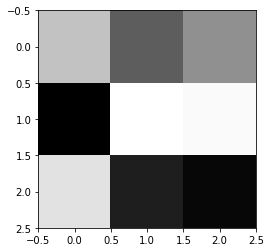

In [ ]:
import matplotlib.pyplot as plt
weights = model.layers[0].get_weights()[0]
plt.imshow(weights[:,:,0,2],cmap='gray')      #(3, 3, 1, 32)

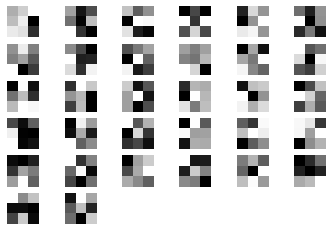

In [ ]:
for i in range(32):     # 32 is filter count
    plt.subplot(6,6,i+1)
    # plt.imshow(weights[:,:,0,i],cmap='gray',interpolation='none')
    plt.imshow(weights[:,:,0,i],cmap='gray')
    plt.axis('off')

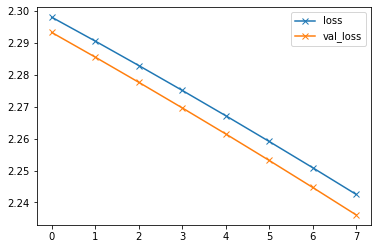

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'x-', label='loss')
plt.plot(hist.history['val_loss'], 'x-', label='val_loss')
plt.legend()

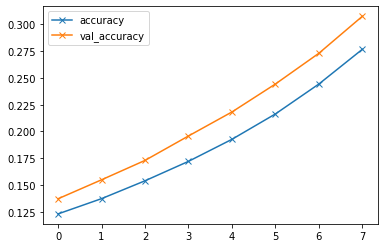

In [ ]:
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.legend()

#MaxPooling

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(layers.Input(shape=x_train[0].shape))   
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))    # (batch_size, rows, cols, channels)
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train,  batch_size=batch_size, epochs=epoch, validation_data=(x_test, y_test)) #within validation_data

Epoch 1/8
30/30 [==============================] - 17s 563ms/step - loss: 2.2999 - accuracy: 0.1508 - val_loss: 2.2959 - val_accuracy: 0.1497
Epoch 2/8
30/30 [==============================] - 17s 556ms/step - loss: 2.2951 - accuracy: 0.1625 - val_loss: 2.2925 - val_accuracy: 0.1576
Epoch 3/8
30/30 [==============================] - 17s 556ms/step - loss: 2.2931 - accuracy: 0.1662 - val_loss: 2.2890 - val_accuracy: 0.1657
Epoch 4/8
30/30 [==============================] - 17s 554ms/step - loss: 2.2898 - accuracy: 0.1731 - val_loss: 2.2854 - val_accuracy: 0.1758
Epoch 5/8
30/30 [==============================] - 17s 561ms/step - loss: 2.2848 - accuracy: 0.1857 - val_loss: 2.2818 - val_accuracy: 0.1830
Epoch 6/8
30/30 [==============================] - 17s 569ms/step - loss: 2.2820 - accuracy: 0.1918 - val_loss: 2.2781 - val_accuracy: 0.1936
Epoch 7/8
30/30 [==============================] - 17s 567ms/step - loss: 2.2787 - accuracy: 0.1983 - val_loss: 2.2744 - val_accuracy: 0.2020
Epoch 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
second_layer_weights = model.layers[1].get_weights()
second_layer_weights  # second_layer_weights.shape

[]

In [ ]:
weights = model.layers[3].get_weights()[0]
type(weights), weights.shape

(numpy.ndarray, (5408, 10))

In [ ]:
third_layer_weights = model.layers[3].get_weights()
third_layer_weights[0].shape, third_layer_weights[0]

((5408, 10), array([[-0.00927489, -0.00751183, -0.03097124, ...,  0.03214822,
         -0.01440742,  0.00215486],
        [-0.022694  ,  0.0232421 ,  0.02317715, ..., -0.01131915,
         -0.03177566, -0.01015208],
        [ 0.0280673 , -0.01501019,  0.02014371, ...,  0.00553645,
         -0.0215067 , -0.03082386],
        ...,
        [ 0.00117252, -0.02635794,  0.00087275, ..., -0.01144464,
          0.03076044,  0.00921899],
        [ 0.00738442,  0.03203042,  0.00555248, ...,  0.0138641 ,
          0.00239795, -0.02897373],
        [ 0.0161751 , -0.012303  , -0.01894673, ...,  0.00804294,
         -0.00682421,  0.00539017]], dtype=float32))

In [ ]:
# W = model.layers[3].get_weights()[0]
# W[0].shape
# plt.figure(1, figsize=(14,7))
# for i in range(15):
#     plt.subplot(3,5,i+1)
#     plt.imshow(W[:,i].reshape(28,28), cmap='gray', interpolation='none')

(10,)

# Deep Layer

In [ ]:
tf.keras.backend.clear_session()

# @tf.function
def deep_cnn_advanced():
  model = tf.keras.Sequential()

  model.add(layers.Input(shape=x_train[0].shape))   
  # model.add(layers.Conv2D(input_shape = x_train[0].shape, filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
  model.add(layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu'))
  model.add(layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu'))
  model.add(layers.MaxPooling2D(pool_size = (2,2)))
  model.add(layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu'))
  model.add(layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu'))
  model.add(layers.MaxPooling2D(pool_size = (2,2)))
  model.add(layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu'))
  model.add(layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu'))
  model.add(layers.MaxPooling2D(pool_size = (2,2)))

  # prior layer should be flattend to be connected to dense layers
  model.add(layers.Flatten())
  # dense layer with 50 neurons
  model.add(layers.Dense(50, activation = 'relu'))
  # final layer with 10 neurons to classify the instances
  model.add(layers.Dense(10, activation = 'softmax'))

  # adam = optimizers.Adam(lr = 0.001)
  model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  return model
model = deep_cnn_advanced()
# model.summary()

In [ ]:
model.input_shape

(None, 28, 28, 1)

In [ ]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, validation_split=0.3, verbose=1)

Epoch 1/8
21/21 [==============================] - 258s 12s/step - loss: 1.9139 - accuracy: 0.3784 - val_loss: 0.5191 - val_accuracy: 0.8317
Epoch 2/8
21/21 [==============================] - 253s 12s/step - loss: 0.4605 - accuracy: 0.8569 - val_loss: 0.2427 - val_accuracy: 0.9261
Epoch 3/8
21/21 [==============================] - 255s 12s/step - loss: 0.2239 - accuracy: 0.9301 - val_loss: 0.1512 - val_accuracy: 0.9533
Epoch 4/8
21/21 [==============================] - 256s 12s/step - loss: 0.1411 - accuracy: 0.9571 - val_loss: 0.1110 - val_accuracy: 0.9653
Epoch 5/8
21/21 [==============================] - 253s 12s/step - loss: 0.0967 - accuracy: 0.9708 - val_loss: 0.0933 - val_accuracy: 0.9714
Epoch 6/8
21/21 [==============================] - 254s 12s/step - loss: 0.0777 - accuracy: 0.9759 - val_loss: 0.0776 - val_accuracy: 0.9764
Epoch 7/8
21/21 [==============================] - 253s 12s/step - loss: 0.0637 - accuracy: 0.9809 - val_loss: 0.0719 - val_accuracy: 0.9789
Epoch 8/8
21/

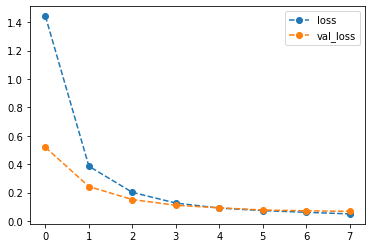

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'o--', label='loss')
plt.plot(hist.history['val_loss'], 'o--', label='val_loss')
plt.legend()

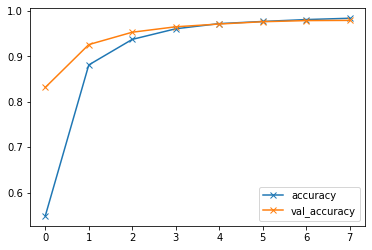

In [ ]:
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.legend()

# Batch Normalization
https://buomsoo-kim.github.io/keras/2018/05/05/Easy-deep-learning-with-Keras-11.md/

In [2]:
tf.keras.backend.clear_session()

def deep_cnn_advanced():
    model = tf.keras.Sequential()

    model.add(layers.Conv2D(input_shape = x_train[0].shape, filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size = (2,2)))
    model.add(layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size = (2,2)))
    model.add(layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(layers.Flatten())
    # dense layer with 50 neurons
    model.add(layers.Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(layers.Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(layers.Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    # adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model
model = deep_cnn_advanced()

In [3]:
# model.summary()
model.input, model.output

(<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>)

In [4]:
hist = model.fit(x_train, y_train, batch_size=int(len(y_train)/5), epochs=epoch, validation_split=0.3, verbose=1)

Epoch 1/8
4/4 [==============================] - 18s 2s/step - loss: 2.9676 - accuracy: 0.1563 - val_loss: 2.1661 - val_accuracy: 0.2301
Epoch 2/8
4/4 [==============================] - 5s 1s/step - loss: 1.7930 - accuracy: 0.3643 - val_loss: 2.0387 - val_accuracy: 0.2847
Epoch 3/8
4/4 [==============================] - 5s 1s/step - loss: 1.4292 - accuracy: 0.5130 - val_loss: 1.5810 - val_accuracy: 0.4873
Epoch 4/8
4/4 [==============================] - 5s 1s/step - loss: 1.1545 - accuracy: 0.6122 - val_loss: 1.3285 - val_accuracy: 0.6302
Epoch 5/8
4/4 [==============================] - 5s 1s/step - loss: 0.9538 - accuracy: 0.6819 - val_loss: 1.2010 - val_accuracy: 0.6172
Epoch 6/8
4/4 [==============================] - 5s 1s/step - loss: 0.7999 - accuracy: 0.7384 - val_loss: 1.0741 - val_accuracy: 0.6489
Epoch 7/8
4/4 [==============================] - 5s 1s/step - loss: 0.6840 - accuracy: 0.7788 - val_loss: 0.9279 - val_accuracy: 0.7233
Epoch 8/8
4/4 [==============================] 

#save model

In [ ]:
rm -rf ./mnist_keras_model*

##with save

In [ ]:
model.save('mnist_keras_model')

INFO:tensorflow:Assets written to: mnist_keras_model/assets


In [ ]:
!zip -r mnist_keras_model.zip ./mnist_keras_model

  adding: mnist_keras_model/ (stored 0%)
  adding: mnist_keras_model/variables/ (stored 0%)
  adding: mnist_keras_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: mnist_keras_model/variables/variables.index (deflated 75%)
  adding: mnist_keras_model/saved_model.pb (deflated 91%)
  adding: mnist_keras_model/assets/ (stored 0%)


##with saved_model

In [ ]:
# Model frozen ?
tf.saved_model.save(model, 'mnist_keras_saved_model')

INFO:tensorflow:Assets written to: mnist_keras_saved_model/assets


In [ ]:
!zip -r mnist_keras_saved_model.zip ./mnist_keras_saved_model

  adding: mnist_keras_saved_model/ (stored 0%)
  adding: mnist_keras_saved_model/variables/ (stored 0%)
  adding: mnist_keras_saved_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: mnist_keras_saved_model/variables/variables.index (deflated 75%)
  adding: mnist_keras_saved_model/saved_model.pb (deflated 91%)
  adding: mnist_keras_saved_model/assets/ (stored 0%)


##with export saved model as text

In [ ]:
# Model export 
# https://www.tensorflow.org/api_docs/python/tf/compat/v1/keras/experimental/export_saved_model
tf.compat.v1.keras.experimental.export_saved_model(model, 'mnist_keras_model_exportasText', as_text=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/saving/saved_model_experimental.py:129: UserWarning: `tf.keras.experimental.export_saved_model` is deprecatedand will be removed in a future version. Please use `model.save(..., save_format="tf")` or `tf.keras.models.save_model(..., save_format="tf")`.
  warnings.warn('`tf.keras.experimental.export_saved_model` is deprecated'
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:492: UserWarning: `tf.keras.backend.learning_phase_scope` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.learning_phase_scope` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` ar

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:S

In [ ]:
!zip -r mnist_keras_model_exportasText.zip mnist_keras_model_exportasText/

  adding: mnist_keras_model_exportasText/ (stored 0%)
  adding: mnist_keras_model_exportasText/saved_model.pbtxt (deflated 96%)
  adding: mnist_keras_model_exportasText/variables/ (stored 0%)
  adding: mnist_keras_model_exportasText/variables/checkpoint (deflated 37%)
  adding: mnist_keras_model_exportasText/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: mnist_keras_model_exportasText/variables/variables.index (deflated 75%)
  adding: mnist_keras_model_exportasText/assets/ (stored 0%)
  adding: mnist_keras_model_exportasText/assets/saved_model.json (deflated 92%)


##with export saved model as Non text

In [ ]:
# Model export 
# https://www.tensorflow.org/api_docs/python/tf/compat/v1/keras/experimental/export_saved_model
tf.compat.v1.keras.experimental.export_saved_model(model, 'mnist_keras_model_export', as_text=False)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/saving/saved_model_experimental.py:129: UserWarning: `tf.keras.experimental.export_saved_model` is deprecatedand will be removed in a future version. Please use `model.save(..., save_format="tf")` or `tf.keras.models.save_model(..., save_format="tf")`.
  warnings.warn('`tf.keras.experimental.export_saved_model` is deprecated'
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:492: UserWarning: `tf.keras.backend.learning_phase_scope` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.learning_phase_scope` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` ar

INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tens

In [ ]:
!zip -r mnist_keras_model_export.zip ./mnist_keras_model_export

  adding: mnist_keras_model_export/ (stored 0%)
  adding: mnist_keras_model_export/variables/ (stored 0%)
  adding: mnist_keras_model_export/variables/checkpoint (deflated 37%)
  adding: mnist_keras_model_export/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: mnist_keras_model_export/variables/variables.index (deflated 75%)
  adding: mnist_keras_model_export/saved_model.pb (deflated 90%)
  adding: mnist_keras_model_export/assets/ (stored 0%)
  adding: mnist_keras_model_export/assets/saved_model.json (deflated 92%)


#convert to ONNX

In [5]:
!python -m pip install -U onnx tf2onnx

     |████████████████████████████████| 7.7MB 7.7MB/s 
     |████████████████████████████████| 307kB 53.6MB/s 


In [6]:
model.save('mnist_keras_model')

INFO:tensorflow:Assets written to: mnist_keras_model/assets


In [ ]:
!python -m tf2onnx.convert --saved-model ./mnist_keras_model/ --output model.onnx

In [9]:
import onnx
import keras2onnx

##Frozen Graph

In [ ]:
from tensorflow.python.tools import freeze_graph
output_graph = 'frozen_model.pb'
output_node_names = 'model/fts_output/out'
input_saver = ""
input_binary = True
restore_op_name = 'save/restore_all'
filename_tensor_name = 'save/Const:0'
clear_devices = True
initializer_nodes = ''
variable_names_blacklist = ''


freeze_graph.freeze_graph('', input_saver, input_binary,
			'', output_node_names,
			restore_op_name, filename_tensor_name,
			output_graph, clear_devices, initializer_nodes,
			variable_names_blacklist, input_saved_model_dir='saved_model')

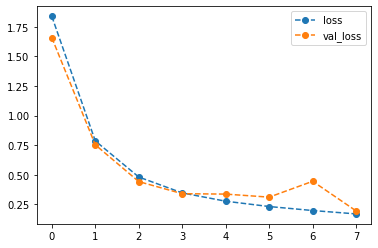

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'o--', label='loss')
plt.plot(hist.history['val_loss'], 'o--', label='val_loss')
plt.legend()

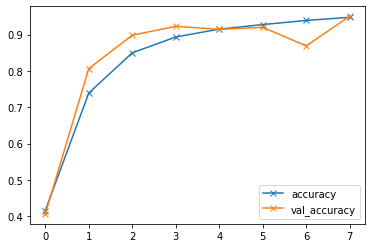

In [ ]:
plt.plot(hist.history['accuracy'], 'x-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x-', label='val_accuracy')
plt.legend()

#predict

##with load dataset

In [ ]:
predic_number=0

In [ ]:
x_test[predic_number].shape, y_test[predic_number], y_test[predic_number].shape

((28, 28, 1), 7, ())

In [ ]:
x_test_one = x_test[predic_number].reshape(1, img_rows, img_cols, 1)

In [ ]:
model.predict(x_test_one).argmax()

7

##with excel file

In [ ]:
import pandas as pd
handmnist = 'handMNIST2828_one_predict.xlsx'
# handmnist = 'handMNIST2828_two_predict.xlsx'

df = pd.read_excel(handmnist, header=None)
# df
import matplotlib.pyplot as plt

plt.imshow(df.values)
import numpy as np
x_pred = np.array(df.values)
x_pred.shape
x_pred = x_pred.reshape(-1, img_rows, img_cols, 1)
# np_x_pred = np.array([x_pred])
# x_pred = x_pred.reshape(1, x_pred[0], x_pred[1], 1)
x_pred.shape

In [ ]:
x_pred = x_pred / 255
model.predict(x_pred).argmax()

##with image

In [ ]:
import numpy as np

image_path = './mnist_own_5.png'
image = tf.keras.preprocessing.image.load_img(image_path,  color_mode="grayscale", target_size=(28,28))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.


In [ ]:
image.width, image.height

(28, 28)

In [ ]:
x_pred = input_arr.reshape(-1, image.width, image.height, 1)
model.predict(x_pred).argmax(), model.predict(x_pred)

(2, array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'o--', label='loss')
plt.plot(hist.history['val_loss'], 'o--', label='val_loss')
plt.legend()

##with opencv

In [ ]:
from cv2 import cv2 as cv 

In [ ]:
image = cv.imread(image_path, 0)
type(image), image.shape

(numpy.ndarray, (143, 144))

In [ ]:
input_blob = cv.dnn.blobFromImage(image, size=(28,28)) 
input_blob.shape

(1, 1, 28, 28)

In [ ]:
x_pred = input_blob.reshape(-1, 28, 28, 1)
model.predict(x_pred).argmax(), model.predict(x_pred)

(2, array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))

#Opencv DNN

In [8]:
import cv2
import numpy as np

model_path = './model.onnx'
net = cv2.dnn.readNetFromONNX(model_path)
for t in net.getLayerTypes():
  print('\t%d layers of type %s' % (net.getLayersCount(t), t))


	6 layers of type Convolution
	2 layers of type InnerProduct
	1 layers of type Permute
	3 layers of type Pooling
	7 layers of type Relu
	2 layers of type Reshape
	2 layers of type Scale
	1 layers of type Softmax
	1 layers of type __NetInputLayer__


In [9]:

image_path = './mnist_own_5.png'  
image = cv2.imread(image_path, 0)

# Resize Image
image = cv2.resize(image,(28,28)) / 255.0
input_blob = image.reshape(-1, 28, 28, 1)

# Input Image to the network
# net.setInput(img)
net.setInput(input_blob)

In [10]:
out = net.forward()
out.argmax(), out

(0, array([[0.37710342, 0.00664032, 0.34183863, 0.03636645, 0.03590443,
         0.01527144, 0.05237498, 0.00174828, 0.08149169, 0.05126037]],
       dtype=float32))